In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold
import lightgbm as lgb
import warnings
from sklearn.preprocessing import OneHotEncoder
import zipfile
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')
n_splits = 5
seed = 35
path = 'E:/BDCI Match/'

#文件路径
traindataFile = path + 'train.csv'
testdataFile = path+ 'test.csv'

#文件加载
train = pd.read_csv(traindataFile)
test = pd.read_csv(testdataFile)

#current_service为99104722的记录可以剔除，因为service_type=3 <=> current_service=99104722
train1 = train.loc[train['service_type']==1]
train1 = train1.reset_index()

train2 = train.loc[train['service_type']==4]
train2 = train2.reset_index()

test1 = test.loc[test['service_type']==1]
test1 = test1.reset_index()
test2 = test.loc[test['service_type']==4]
test2 = test2.reset_index()
test3 = test.loc[test['service_type']==3]
test3 = test3.reset_index()
test_id3 = test3['user_id']

# 对标签编码 映射关系
label2current_service1 = dict(zip(range(0,len(set(train1['current_service']))),sorted(list(set(train1['current_service'])))))
current_service2label1 = dict(zip(sorted(list(set(train1['current_service']))),range(0,len(set(train1['current_service'])))))

label2current_service2 = dict(zip(range(0,len(set(train2['current_service']))),sorted(list(set(train2['current_service'])))))
current_service2label2 = dict(zip(sorted(list(set(train2['current_service']))),range(0,len(set(train2['current_service'])))))

# 原始数据的标签映射
train1['current_service'] = train1['current_service'].map(current_service2label1)
train2['current_service'] = train2['current_service'].map(current_service2label2)

train_col = train1.columns

# 数据有问题数据
for i in train_col:
    train1[i] = train1[i].replace("\\N",-1)
    train2[i] = train2[i].replace("\\N",-1)

In [41]:
train1.dtypes

index                       int64
service_type                int64
is_mix_service              int64
online_time                 int64
1_total_fee               float64
2_total_fee                object
3_total_fee                object
4_total_fee               float64
month_traffic             float64
many_over_bill              int64
contract_type               int64
contract_time               int64
is_promise_low_consume      int64
net_service                 int64
pay_times                   int64
pay_num                   float64
last_month_traffic        float64
local_trafffic_month      float64
local_caller_time         float64
service1_caller_time      float64
service2_caller_time      float64
gender                     object
age                        object
complaint_level             int64
former_complaint_num        int64
former_complaint_fee      float64
current_service             int64
user_id                    object
dtype: object

In [68]:
object_cols = ["2_total_fee","3_total_fee","gender","age"]

train1[object_cols] = train1[object_cols].apply(pd.to_numeric, errors='coerce')
train2[object_cols] = train1[object_cols].apply(pd.to_numeric, errors='coerce')

In [ ]:
from sklearn import manifold
#降维
train1.pop("user_id")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)

X_tsne = tsne.fit_transform(train1)
#绘图
plot_embedding(X_tsne,"t-SNE embedding of the digits (time: %.3fs)" % (time.time() - start_time))
plt.show()


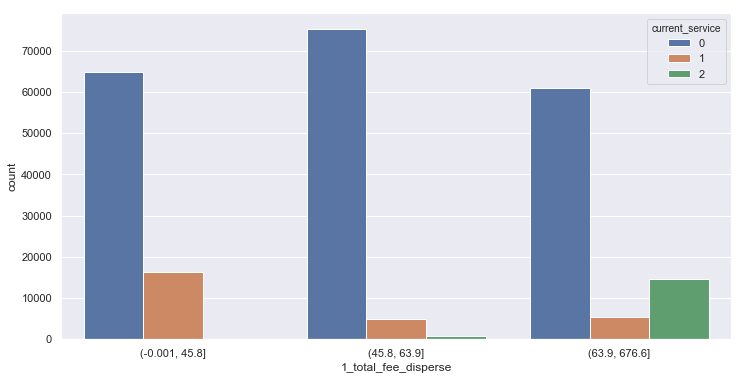

In [52]:
train1['1_total_fee_disperse'] = pd.qcut(train1['1_total_fee'],3)
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='1_total_fee_disperse', hue = 'current_service', data=train1)

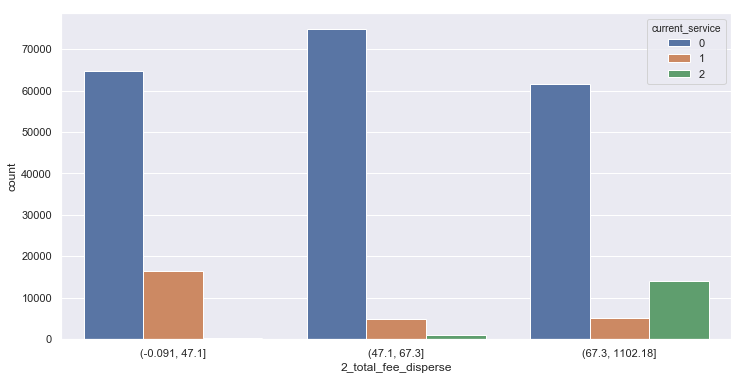

In [51]:
train1['2_total_fee_disperse'] = pd.qcut(train1['2_total_fee'],3)
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='2_total_fee_disperse', hue = 'current_service', data=train1)

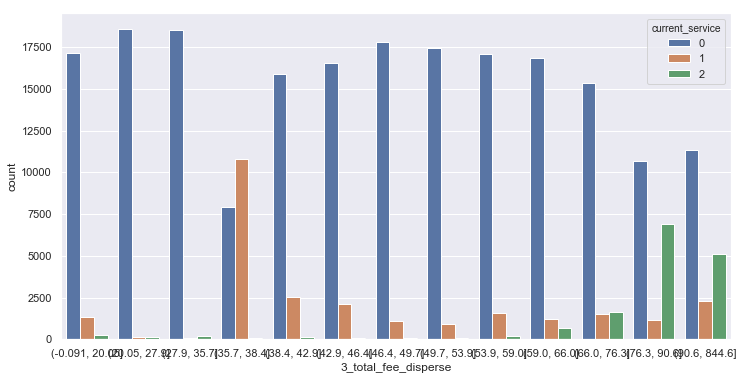

In [57]:
train1['3_total_fee_disperse'] = pd.qcut(train1['3_total_fee'],13)
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='3_total_fee_disperse', hue = 'current_service', data=train1)

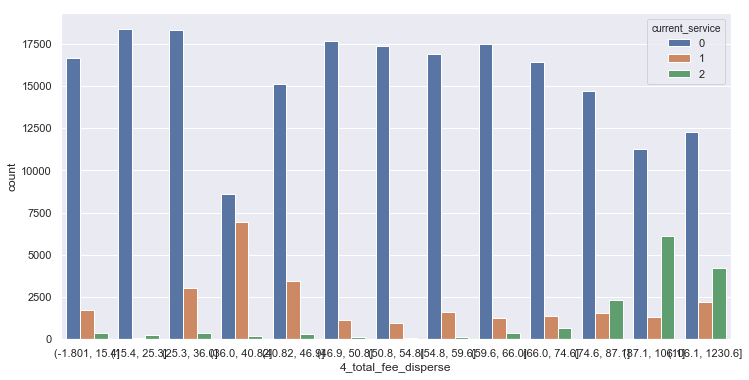

In [56]:
train1['4_total_fee_disperse'] = pd.qcut(train1['4_total_fee'],13)
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='4_total_fee_disperse', hue = 'current_service', data=train1)

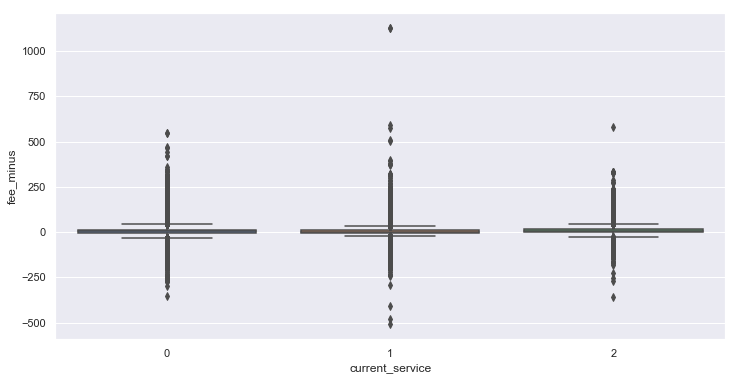

In [65]:
train1['fee_minus'] = train1['4_total_fee']-train1['3_total_fee']
sns.boxplot(x='current_service', y='fee_minus',data = train1)

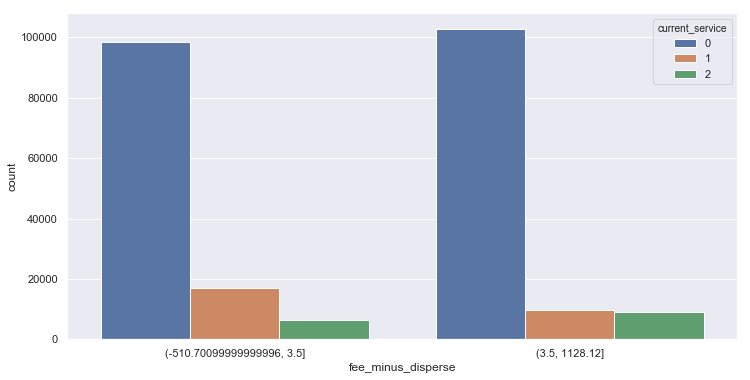

In [66]:
train1['fee_minus_disperse'] = pd.qcut(train1['fee_minus'],2)
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='fee_minus_disperse', hue = 'current_service', data=train1)